In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [3]:

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

print("----------------------------------")

print("MEAN AGE BY OCCUPATION")
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

print("----------------------------------")


print("MALE RATIO BY OCCUPATION")
male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_sorted = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_sorted)

print("----------------------------------")


print("MIN AND MAX AGE BY OCCUPATION")
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)

print("----------------------------------")


print("MEAN AGE PER OCCUPATION AND SEX")
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_sex)

print("----------------------------------")


print("PERCENTAGE OF WOMEN AND MEN PER OCCUPATION")
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_percentage_per_occupation = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100
print(gender_percentage_per_occupation)

----------------------------------
MEAN AGE BY OCCUPATION
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
----------------------------------
MALE RATIO BY OCCUPATION
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educato

# Question 2

In [41]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url, sep=',')

print("----------------------------------")

print("GOAL COLUMN")
goals = euro12['Goals']
print(goals)

print("----------------------------------")


print("Number of Teams participated in Euro 2012")
num_teams = euro12['Team'].nunique()
print(f"The Number of teams that participated are: {num_teams}")

print("----------------------------------")


print("Number of columns in the dataset")
num_columns = euro12.shape[1]
print(f"The Number of columns are: {num_columns}")

print("----------------------------------")


print("View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline")
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

print("----------------------------------")


print("Sort the teams by Red Cards, then to Yellow Cards")
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
print(sorted_teams)

print("----------------------------------")


print("Calculate the mean Yellow Cards given per Team")
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards}")

print("----------------------------------")


print("Filter teams that scored more than 6 goals")
teams_more_than_6_goals = euro12[euro12['Goals'] > 6][['Team','Goals']]
print(teams_more_than_6_goals)

print("----------------------------------")


print("Select the teams that start with G")
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')][['Team']]
print(teams_start_with_g)

print("----------------------------------")


print("Select the first 7 columns")
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

print("----------------------------------")


print("Select all columns except the last 3")
all_except_last_3 = euro12.iloc[:, :-3]
print(all_except_last_3)

print("----------------------------------")


print("Present only the Shooting Accuracy from England, Italy and Russia")
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


----------------------------------
GOAL COLUMN
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
----------------------------------
Number of Teams participated in Euro 2012
The Number of teams that participated are: 16
----------------------------------
Number of columns in the dataset
The Number of columns are: 35
----------------------------------
View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy        

# Question 3

In [5]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("----------------------------------")

print("Create a DataFrame by joinning the Series by column")
df = pd.DataFrame({'series1': series1, 'series2': series2, 'series3': series3})
print(df.head())

print("----------------------------------")

print("Change the name of the columns to bedrs, bathrs, price_sqr_meter")
df = df.rename(columns={'series1': 'bedrs', 'series2': 'bathrs', 'series3': 'price_sqr_meter'})
print(df.head())

print("----------------------------------")

print("Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'")
bigcolumn = pd.concat([series1, series2, series3], ignore_index=False).to_frame(name='bigcolumn')
print(bigcolumn)

print("----------------------------------")

print("Reindex the DataFrame so it goes from 0 to 299")
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn = bigcolumn.reindex(range(300))
print(bigcolumn)

----------------------------------
Create a DataFrame by joinning the Series by column
   series1  series2  series3
0        3        3    27844
1        4        2    18700
2        2        3    23860
3        4        3    10180
4        3        3    25917
----------------------------------
Change the name of the columns to bedrs, bathrs, price_sqr_meter
   bedrs  bathrs  price_sqr_meter
0      3       3            27844
1      4       2            18700
2      2       3            23860
3      4       3            10180
4      3       3            25917
----------------------------------
Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
    bigcolumn
0           3
1           4
2           2
3           4
4           3
..        ...
95      24056
96      29161
97      28964
98      19369
99      24313

[300 rows x 1 columns]
----------------------------------
Reindex the DataFrame so it goes from 0 to 299
     bigcolumn
0            3
1    

# Question 4

In [5]:
data = pd.read_csv('wind.txt', sep=r'\s+', header=0)

In [7]:
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 2061-01-01  

C:\Users\alaba\AppData\Local\Temp\ipykernel_18512\3062249713.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))


In [9]:
def fix_year(year):
    return year - 100 if year > 1989 else year

data['Date'] = data['Date'].apply(lambda date: date.replace(year=fix_year(date.year)))
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 1961-01-01  

In [11]:
data = data.set_index('Date')
print(data.index.dtype)

datetime64[ns]


In [13]:
missing_values = data.isnull().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [15]:
non_missing_values = data.notnull().sum().sum()
print(non_missing_values)

78857


In [27]:
mean_windspeed = data.mean().mean()
print(mean_windspeed)

10.227982360836938


In [28]:
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
print(loc_stats)

            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [17]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [19]:
january_data = data[data.index.month == 1]
january_avg_windspeed = january_data.mean()
print(january_avg_windspeed)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [31]:
yearly_data = data.resample('Y').mean()
print(yearly_data)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [25]:
monthly_data = data.resample('ME').mean()
print(monthly_data)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [21]:
weekly_data = data.resample('W').mean()
print(weekly_data)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [27]:
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_stats)

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3

# Question 5

In [29]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(url, sep='\t')

print("First 10 entries")
print(chipo.head(10))

print("----------------------------------")

num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")

print("----------------------------------")

num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")

print("----------------------------------")

print("Column names:")
print(chipo.columns)

print("----------------------------------")

print("Dataset index:")
print(chipo.index)

print("----------------------------------")

most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"Most-ordered item: {most_ordered_item}")

print("----------------------------------")

most_ordered_item_count = chipo['item_name'].value_counts().max()
print(f"Number of {most_ordered_item} ordered: {most_ordered_item_count}")

print("----------------------------------")

most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print(f"Most ordered item in choice_description: {most_ordered_choice_description}")

print("----------------------------------")

total_items_ordered = chipo['quantity'].sum()
print(f"Total items ordered: {total_items_ordered}")

print("----------------------------------")

chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)

print("----------------------------------")

print(f"Item price type: {chipo['item_price'].dtype}")

print("----------------------------------")

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total revenue: ${revenue:.2f}")

print("----------------------------------")

total_orders = chipo['order_id'].nunique()
print(f"Total orders: {total_orders}")

print("----------------------------------")

average_revenue_per_order = revenue / total_orders
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")

print("----------------------------------")

different_items_sold = chipo['item_name'].nunique()
print(f"Different items sold: {different_items_sold}")

First 10 entries
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3             

# Question 6

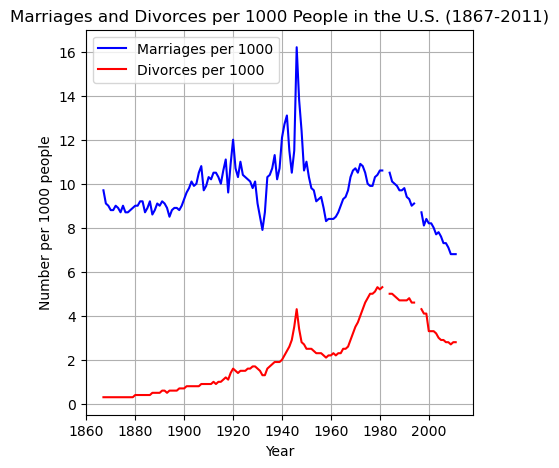

In [31]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv', delimiter=',')

plt.figure(figsize=(5, 5))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')

plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per 1000 People in the U.S. (1867-2011)')

plt.legend()

plt.grid(True)
plt.show()

# Question 7

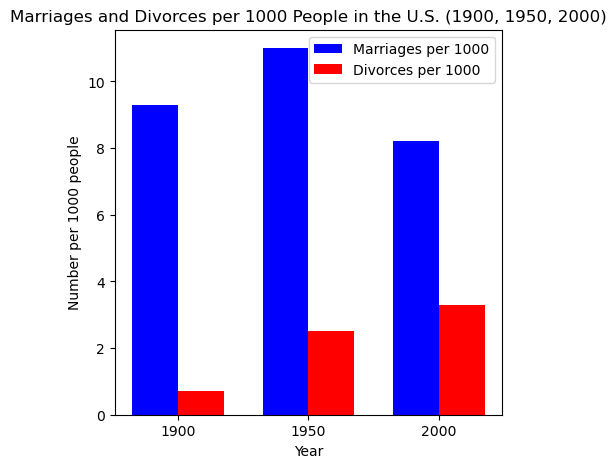

In [33]:
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

bar_width = 0.35

r1 = range(len(selected_years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(5, 5))
plt.bar(r1, selected_years['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color='blue')
plt.bar(r2, selected_years['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per 1000 People in the U.S. (1900, 1950, 2000)')

plt.xticks([r + bar_width/2 for r in range(len(selected_years))], selected_years['Year'])

plt.legend()


plt.show()

# Question 8

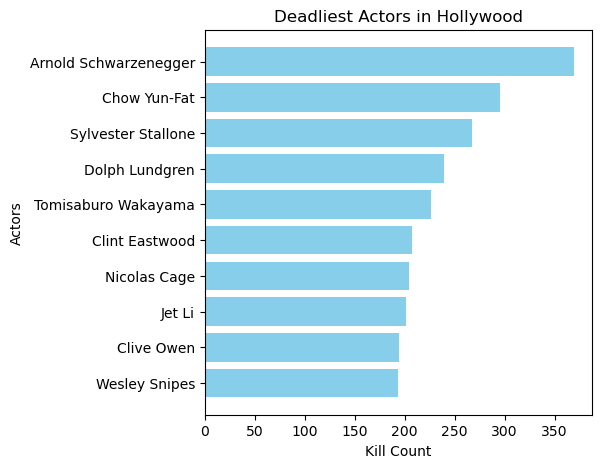

In [35]:
file_path = 'actor_kill_counts.csv' 
data = pd.read_csv(file_path)

data_sorted = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(5, 5))
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()
plt.show()

# Question 9

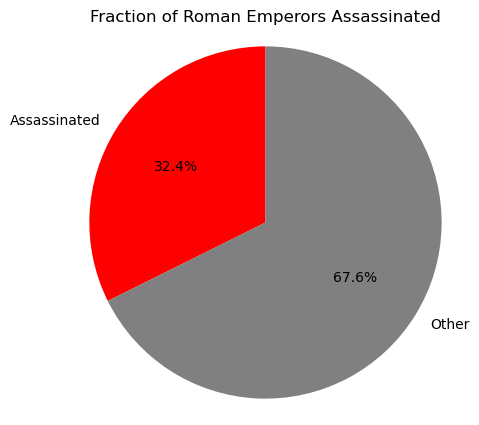

In [37]:
file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

assassinated_count = data['Cause_of_Death'].str.contains('Assassinated').sum()
total_emperors = len(data)
other_count = total_emperors - assassinated_count

labels = ['Assassinated', 'Other']
sizes = [assassinated_count, other_count]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'gray'])
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal') 
plt.show()

# Question 10

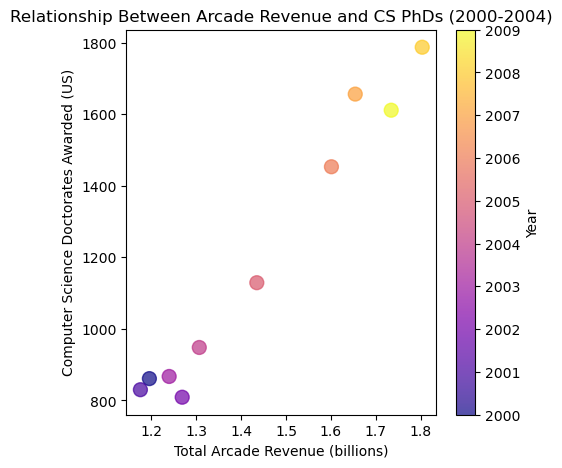

In [39]:
file_path = 'arcade-revenue-vs-cs-doctorates.csv' 
data = pd.read_csv(file_path)

plt.figure(figsize=(5, 5))
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'], 
    cmap='plasma',
    s=100,
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and CS PhDs (2000-2004)')

plt.show()